In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
data=load_breast_cancer()

In [3]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
type(data)

sklearn.utils._bunch.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
data.data.shape

(569, 30)

In [7]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.33)


In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
x_train.shape 

(381, 30)

In [11]:
N,D=x_train.shape

In [12]:
#StandardScaler comes into play when the characteristics of the input dataset differ greatly between their ranges, or simply when they are measured in different units of measure. StandardScaler removes the mean and scales the data to the unit variance
#"removes the mean" is a mathematical subtraction. To remove a mean from a vector of numbers
#A variance of 1 means that the data is approximately a standard normal distribution. A standard normal distribution has a mean of 0 and a variance of 1
#we do that no it can get normal distribution and to make mean 0 and variance 1 so than it has a equal symmetric curve
#if features have so differ in the ranges then fitting them into a machine model would not give us a accurate answer or prediction thats why we convert
#every features values to be in almost same rangei so we need to use standardscalar to make it more normal distribution
from sklearn.preprocessing import StandardScaler
#standardization means making the mean and standard devaition 1
#standard deviation means the average difference between the data values and mean
#standard deviation of 0.5 means the data values are average 0.5 differece from the mean

scalar=StandardScaler()#creating a object scalar (intializing)
X_train=scalar.fit_transform(x_train)
#here fittransform does both fit the data into model or train the data with model
#and also before training it converts the data into data compactable with model
X_test=scalar.transform(x_test)
#we only transform the x_test because we are not training the model with x_test







In [13]:
import tensorflow as tf
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [15]:
r=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6286 - loss: 0.6920 - val_accuracy: 0.6117 - val_loss: 0.6762
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6486 - loss: 0.6244 - val_accuracy: 0.6809 - val_loss: 0.6052
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7395 - loss: 0.5296 - val_accuracy: 0.7128 - val_loss: 0.5450
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7614 - loss: 0.5131 - val_accuracy: 0.7819 - val_loss: 0.4939
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7688 - loss: 0.4757 - val_accuracy: 0.8191 - val_loss: 0.4524
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8073 - loss: 0.4372 - val_accuracy: 0.8298 - val_loss: 0.4183
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8393 - loss: 0.4027 - val_accuracy: 0.8564 - val_loss: 0.3901
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8811 - loss: 0.3521 - val_accuracy: 0.8777 - 

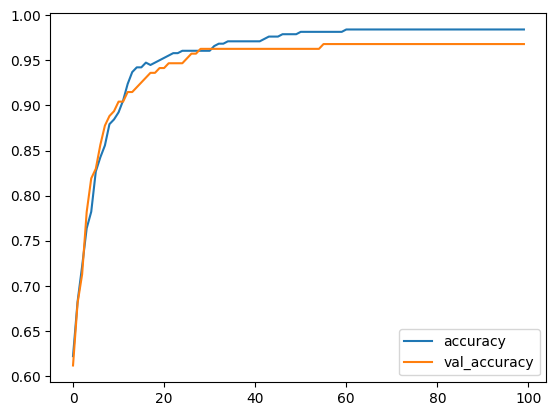

In [16]:
import matplotlib.pyplot as plt 
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [17]:
p=model.predict(X_test)
p
#here thr predicted model in terms of e even after we standarized the x_train data
#is because we are using sigmoid function where y=1/1+e**(-x)
#so we get the predicted output in terms of e 
#so we need to round to the nearest interger that is either 0 or 1 
#we also need to flatten the array since the output y_test is a array of n 
#whereas the predicted is of (n,1) n rows and 2 column we need to flatten to get one dimension

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[9.5367473e-01],
       [3.7857078e-03],
       [9.8838919e-01],
       [4.2745033e-01],
       [9.7222275e-01],
       [7.1208692e-01],
       [8.7410337e-01],
       [9.8833162e-01],
       [6.9021261e-01],
       [9.9837220e-01],
       [9.8961550e-01],
       [1.0879646e-03],
       [9.7456110e-01],
       [9.9606603e-01],
       [1.0984767e-01],
       [7.5560677e-01],
       [9.9844497e-01],
       [9.4806738e-03],
       [9.9922705e-01],
       [9.8916465e-01],
       [9.9950129e-01],
       [9.9678737e-01],
       [9.2321837e-01],
       [8.7063003e-01],
       [9.3775457e-01],
       [9.9960625e-01],
       [9.9600303e-01],
       [9.9968946e-01],
       [9.3853676e-01],
       [1.8171261e-01],
       [9.9544090e-01],
       [2.4018278e-03],
       [9.9763215e-01],
       [9.9932152e-01],
       [9.9954098e-01],
       [3.9941064e-04],
       [9.7727799e-01],
       [2.9133141e-04],
       [8.1484878e-01],
       [8.5423797e-01],
       [9.9868655e-01],
       [2.045401

In [18]:
import numpy as np 
p=np.round(p).flatten() 
p

array([1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1.], dtype=float32)

In [19]:
y_test

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
model.evaluate(X_test,y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.9506 - loss: 0.1642


[0.11939859390258789, 0.9680851101875305]